## Import all Libraries

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import LabelEncoder
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [2]:
warnings.filterwarnings('ignore')

## Let's Read in the Dataset now

In [238]:
titanic_df=pd.read_csv("train.csv")
test_titanic=pd.read_csv("test.csv")
display(titanic_df.shape)
display(test_titanic.shape)
display(titanic_df.sample(5))

(891, 12)

(418, 11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S


## Missing values

In [141]:
display(titanic_df.isnull().values.any())
display(test_titanic.isnull().values.any())

True

True

In [142]:
display(titanic_df.isnull().sum())
print("-"*40)
display(test_titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

----------------------------------------


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Test and Training Dataset information

In [71]:
display(titanic_df.info())
print("-"*40)
display(test_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

In [85]:
display(titanic_df.describe())
print("-"*127)
print("-"*127)
display(test_titanic.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [83]:
describe_df=titanic_df.copy()
describe_test=test_titanic.copy()
describe_df["Survived"]=describe_df["Survived"].astype(object)
describe_df["Pclass"]=describe_df["Pclass"].astype(object)
describe_test["Pclass"]=describe_test["Pclass"].astype(object)
display(describe_df.describe(include=["O"]))
print("-"*80)
print("-"*80)
display(describe_test.describe(include=["O"]))

,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,204,889
unique,2,3,891,2,681,147,3
top,0,3,"Sharp, Mr. Percival James R",male,CA. 2343,B96 B98,S
freq,549,491,1,577,7,4,644


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,418,91,418
unique,3,418,2,363,76,3
top,3,"Angheloff, Mr. Minko",male,PC 17608,B57 B59 B63 B66,S
freq,218,1,266,5,3,270



## Cateogrical Feature Visualization

In [26]:
def plotcat(categorical,target=None):
    fig,axis=plt.subplots(-(-len(categorical)//2),2,figsize=(20,12))
    index=0
    for i in range(-(-len(categorical)//2)):
        for j in range (2):
            if len(categorical)%2==1:
                if i==(-(-len(categorical)//2)-1) and j == 1:
                    fig.delaxes(axis[i,j])
                    continue
            ax=sns.countplot(categorical[index],data=titanic_df,hue=target,ax=axis[i][j])
            if target=="Survived":
                ax.legend(title="Survived?",loc="upper right",labels=["No","Yes"])
            
            for p in ax.patches:
                height=p.get_height()
                ax.text(p.get_x()+p.get_width()/2,height+3,'{:1.3f}%'.format(height/len(titanic_df)*100),ha="center")
            index+=1
    

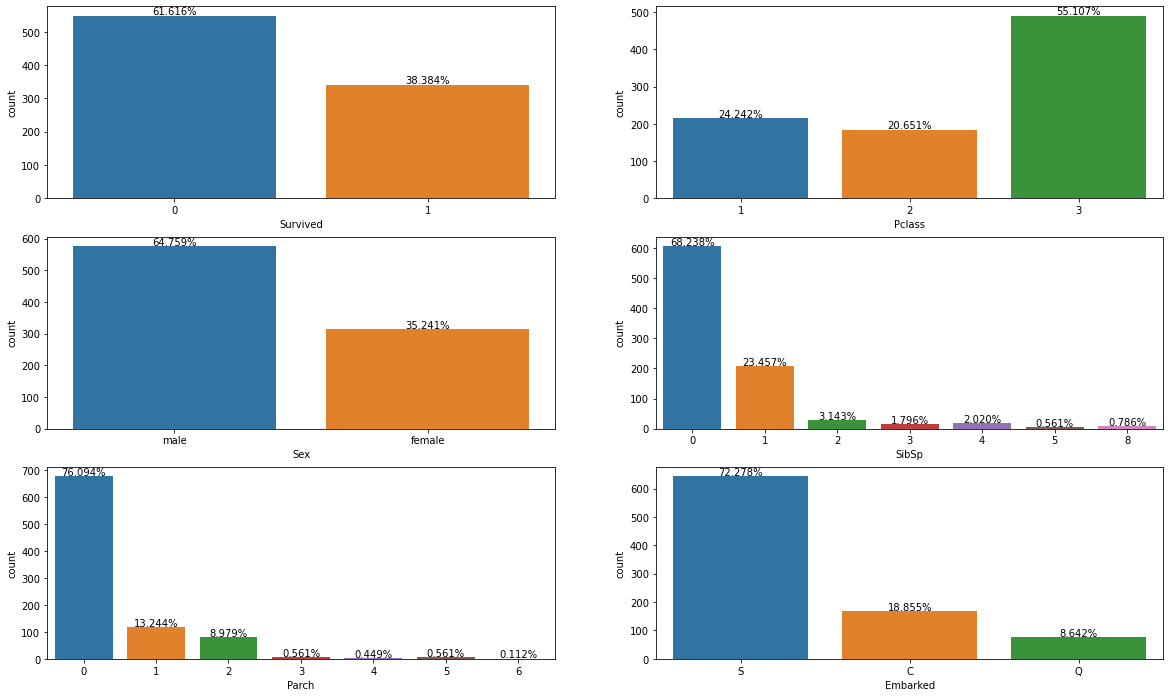

In [27]:
categorical=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
plotcat(categorical)

From the analysis done till now we understand a couple of things: <br>
1. The total number of samples in the training dataset is 891 with the test dataset having 418 samples. <br>
2. Survived is a categorical variable with 0 (did not survive) and 1 (survived) <br>
3. Most passengers in both datasets did not travel with children or parents. <br>
4. Fares varied significantly <br>
5. Few elderly passengers travelled <br>
6. Names are unique across both datasets, which was expected <br>
7. More number of male passengers travelled than female passengers (male=577 in training and male=266 in training) <br>
8. Cabin values have several duplicates, indicating several passengers shared the cabin <br>
9. Ticket feature has several duplicate values as well. <br>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


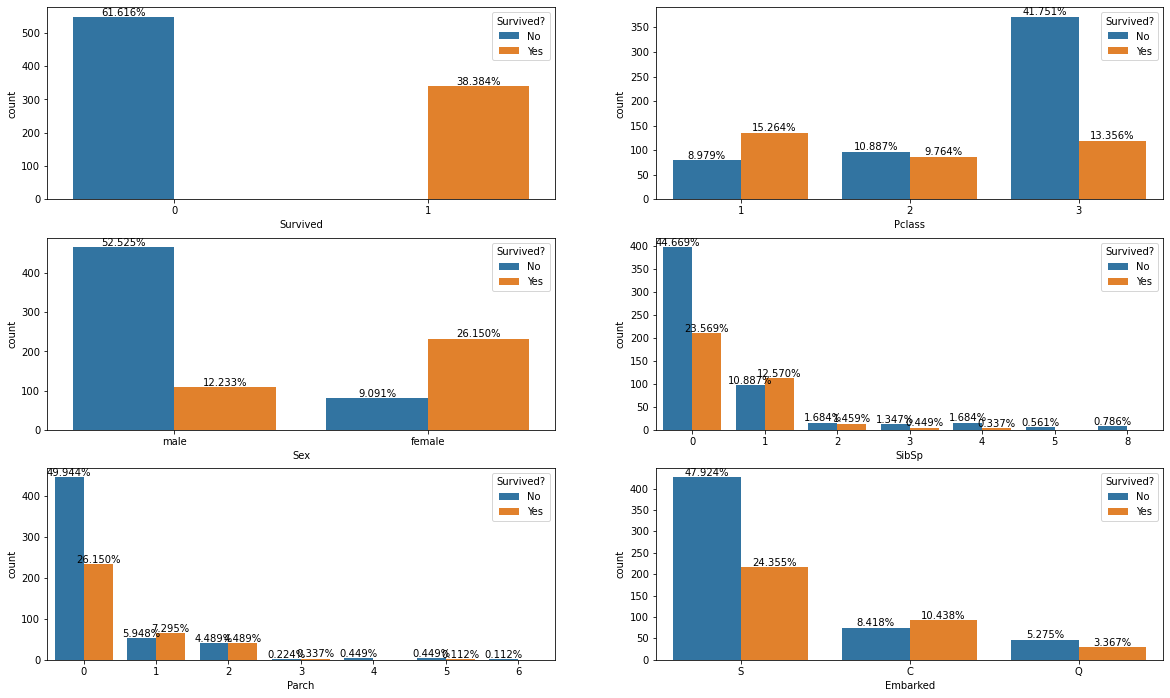

In [28]:
plotcat(categorical,"Survived")

## Numerical Feature Visualization

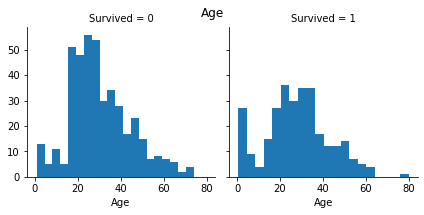

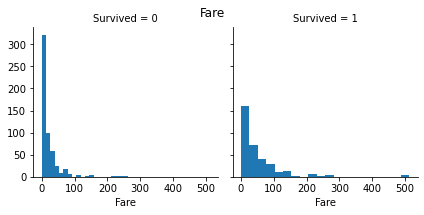

In [132]:
numerical=["Age","Fare"]
for i in numerical:
    g = sns.FacetGrid(titanic_df, col='Survived')
    g.map(plt.hist, i, bins=20)
    plt.suptitle(i)

### Assumptions based on the analysis
We arrive at the following conclusions based on the data analysis conducted so far. <br>
#### Completing
* We may want to complete the Age feature as it is definitely correlated to survival.<br>
This makes sense as well as children and elderly would be given a greater chances of surivival than at any other age. <br>
* We may want to complete Embarked feature as it may correlate to survival or another important feature <br>

#### Removing
* Cabin feature may be dropped as it is highly incomplete or contains null values in both training and test dataset <br>
* PassengerId may be dropped.<br>
* Name feature is relatively non standard and can be dropped after extracting useful information <br>

#### Creating
* New feature called as family based on SibSp and Parch to get total count of the family members on board. <br>
* Engineer a new feature called as Title, extracting it from the Name feature <br>
* May want to create a Age band, to convert continuous feature into ordinal cateogrical feature <br>
* Creating fare range may help the model as well <br>
* Create new ticket feature

#### Classifying
* We notice that Pclass=1 has a higher survival rate than any other class
* The Sex= Females had a higher survival rate than the males
* SibSp and Parch may be better if combined together

## Correlating some of the features together

Text(0, 0.5, 'Density')

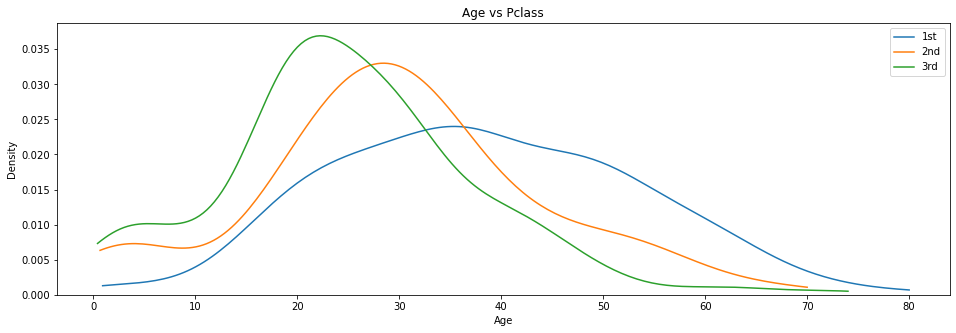

In [139]:
plt.figure(figsize=(16, 5))
for x in [1,2,3]:    ## for 3 classes
    sns.kdeplot(data=titanic_df.Age[titanic_df.Pclass == x],cut = 0, clip=(0,200)).grid(False)
    
plt.title("Age vs Pclass")
plt.legend(("1st","2nd","3rd"))
plt.xlabel("Age")
plt.ylabel("Density")

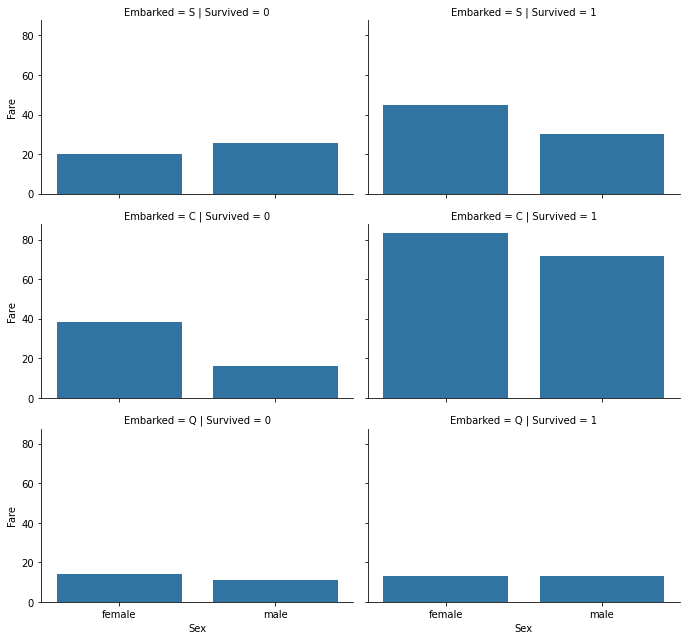

In [102]:
fare_sex=sns.FacetGrid(titanic_df,col="Survived",row="Embarked",size=3,aspect=1.6)
fare_sex.map(sns.barplot,"Sex","Fare",ci=None)
fare_sex.add_legend()

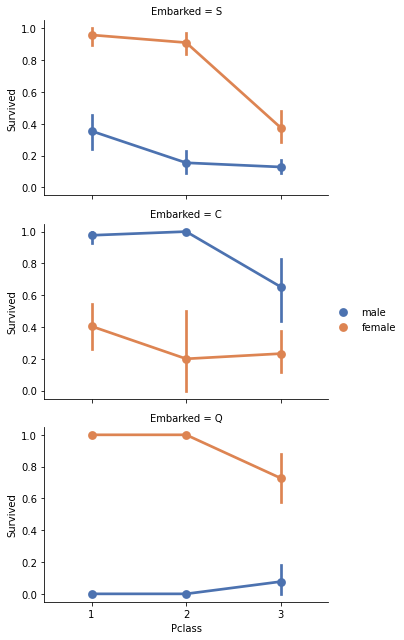

In [95]:
emb_sex_class=sns.FacetGrid(titanic_df,row="Embarked",size=3,aspect=1.6)
emb_sex_class.map(sns.pointplot,"Pclass","Survived","Sex", palette="deep")
emb_sex_class.add_legend()

We learn a couple of things from this:
* Females who were part of the first class had a higher chance of survival than 2nd class and the females in 2nd had higher than 3rd <br>
* Females always had a higher chance of survival irrespecitive of the port they embarked other than C, where males had a higher chance <br>
* People who paid more fare, especially women, had a better chance of surivival, which made sense, as more fare you pay, you tend to be in the first class, which the previous point pointed out means higher survival <br>
* Children as well who were in the first class and second class had a higher survival rate than the third class kids

## Drop features not needed

In [239]:
titanic_df.drop(['Cabin','PassengerId'],axis=1, inplace=True)
test_titanic.drop(['Cabin','PassengerId'],axis=1, inplace=True)
combine_df=[titanic_df,test_titanic]
display(titanic_df.shape)
display(test_titanic.shape)

(891, 10)

(418, 9)

## Feature Engineering

In [240]:
for dataset in combine_df:
    dataset["Title"] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(titanic_df['Title'], titanic_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [241]:
def replace_titles(x):
    title=x["Title"]
    if title in ["Don","Major","Capt","Jonkheer","Rev","Col","Sir"]:
        return "Mr"
    elif title in ["Countess","Mme","Lady","Dona"]:
        return "Mrs"
    elif title in ["Mlle","Ms"]:
        return "Miss"
    elif title=="Dr":
        if x["Sex"]=="Male":
            return "Mr"
        else:
            return "Mrs"
    else:
        return title

In [242]:
for dataframe in combine_df:
    dataframe["Title"]=dataframe.apply(replace_titles,axis=1)

In [243]:
titanic_df[["Title","Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.158192
3,Mrs,0.777778


In [244]:
le_title=LabelEncoder()
le_title.fit(titanic_df["Title"])
for dataframe in combine_df:
    dataframe["Title"]=le_title.transform(dataframe["Title"])
    dataframe.drop("Name",inplace=True,axis=1)

In [245]:
# Since only test dataset had only one Fare column as missing,I decided to add the median value to it
test_titanic["Fare"]=test_titanic.fillna(titanic_df["Fare"].median())
#To handle for the missing values, we inputted random age between the two s.d. from the mean, where 96% of the data is in a normal distribution
#which we saw during visualization
for dataset in combine_df:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

In [246]:
# Create a new feature for family
for dataset in combine_df:
    dataset["FamilySize"]=dataset["SibSp"]+dataset["Parch"]+1
# Whether they have a family or not
for dataframe in combine_df:
    dataframe["Has_Family"]=1
    dataframe.loc[dataframe["FamilySize"]==1, "Has_Family"]=0
    dataframe.drop(["FamilySize","Parch","SibSp"],axis=1,inplace=True)

# Remove all NULLS in the Embarked column
for dataset in combine_df:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
le_sex=LabelEncoder()
le_sex.fit(titanic_df["Sex"])
le_emb=LabelEncoder()
le_emb.fit(titanic_df["Embarked"])
for dataframe in combine_df:
    dataframe["Sex"]=le_sex.transform(dataframe["Sex"])
    dataframe["Embarked"]=le_emb.transform(dataframe["Embarked"])

In [247]:
Ticket1 = []
for i in list(titanic_df.Ticket):
    if not i.isdigit() :
        Ticket1.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket1.append("X")
titanic_df["Ticket"] = Ticket1

Ticket2 = []
for j in list(test_titanic.Ticket):
    if not j.isdigit() :
        Ticket2.append(j.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket2.append("X")
test_titanic["Ticket"] = Ticket2

Here is the tricky part as the tickets had unique values which were different in the test and taining data

In [248]:
display(titanic_df["Ticket"].unique())
display(test_titanic["Ticket"].unique())

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

array(['X', 'A4', 'WEP', 'SCPARIS', 'STONO2', 'PC', 'C', 'A5', 'SCAH',
       'CA', 'WC', 'SOTONOQ', 'STONO', 'SCA3', 'FCC', 'FC', 'PP',
       'STONOQ', 'SCA4', 'SOPP', 'SOC', 'SOTONO2', 'AQ4', 'A', 'SC',
       'SCParis', 'LP', 'AQ3'], dtype=object)

In [249]:
np.intersect1d(titanic_df["Ticket"],test_titanic["Ticket"])

array(['A4', 'A5', 'C', 'CA', 'FC', 'FCC', 'PC', 'PP', 'SC', 'SCA4',
       'SCAH', 'SCPARIS', 'SCParis', 'SOC', 'SOPP', 'SOTONO2', 'SOTONOQ',
       'STONO', 'STONO2', 'WC', 'WEP', 'X'], dtype=object)

In [250]:
train=titanic_df.copy()
test=test_titanic.copy()
# remove_list_train=list((set(train["Ticket"].unique()))-(set(train["Ticket"].unique())))
# remove_list_test=list((set(test["Ticket"].unique()))-((set(test["Ticket"].unique()))))

In [251]:
train= pd.get_dummies(train, columns = ["Ticket"], prefix="T")
test = pd.get_dummies(test, columns = ["Ticket"], prefix="T")

In [258]:
# remove_list_train=list(map("T_".__add__,remove_list_train))
# remove_list_test=list(map("T_".__add__,remove_list_test))
# new_df=train.drop(remove_list_train)
# new_df.head()

In [255]:
train.drop(['T_SP','T_SOP','T_Fa','T_LINE','T_SWPP','T_SCOW','T_PPP','T_AS','T_CASOTON'],axis = 1,inplace=True)
test.drop(['T_SCA3','T_STONOQ','T_AQ4','T_A','T_LP','T_AQ3'],axis = 1,inplace=True)

In [264]:
train.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Has_Family,T_A4,T_A5,...,T_SCParis,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_WC,T_WEP,T_X
348,1,3,1,3,15.900,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
253,0,3,1,30,16.100,2,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
759,1,1,0,33,86.500,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
664,1,3,1,20,7.925,2,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
567,0,3,0,29,21.075,2,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [265]:
display(train.isnull().sum())
print("-"*40)
display(test.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
Has_Family    0
T_A4          0
T_A5          0
T_C           0
T_CA          0
T_FC          0
T_FCC         0
T_PC          0
T_PP          0
T_SC          0
T_SCA4        0
T_SCAH        0
T_SCPARIS     0
T_SCParis     0
T_SOC         0
T_SOPP        0
T_SOTONO2     0
T_SOTONOQ     0
T_STONO       0
T_STONO2      0
T_WC          0
T_WEP         0
T_X           0
dtype: int64

----------------------------------------


Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
Has_Family    0
T_A4          0
T_A5          0
T_C           0
T_CA          0
T_FC          0
T_FCC         0
T_PC          0
T_PP          0
T_SC          0
T_SCA4        0
T_SCAH        0
T_SCPARIS     0
T_SCParis     0
T_SOC         0
T_SOPP        0
T_SOTONO2     0
T_SOTONOQ     0
T_STONO       0
T_STONO2      0
T_WC          0
T_WEP         0
T_X           0
dtype: int64

In [266]:
display(train.shape)
display(test.shape)

(891, 30)

(418, 29)


## Define a Model Function

In [267]:
def pred_model(X,y,models,cv):
    train_acc_dict={}
    test_acc_dict={}
    time_dict={}
    imp_features={}
    
    for model in models:
        current_model=model.__class__.__name__
        cv_results=cross_validate(model,X,y,cv=cv, return_train_score=True,scoring="accuracy")
        
        train_acc_dict[current_model]=cv_results["train_score"].mean()
        test_acc_dict[current_model]=cv_results["test_score"].mean()
        time_dict[current_model]=cv_results["fit_time"].mean()
        try:
            imp_features[current_model]=pd.DataFrame(sorted(zip(model.Features_importances_,X.columns),
                                                            columns=["Value",Features]))
        except:
            pass
    return train_acc_dict,test_acc_dict,time_dict,imp_features

In [268]:
def results_plot(result_1, result_2=None,ylabel_1="Score",ylabel_2="Score",title=None):
    first_df=pd.DataFrame({"Model":list(result_1.keys()),ylabel_1:list(result_1.values())})
    if ylabel_2!=None:
        second_df=pd.DataFrame({"Model":list(result_2.keys()),ylabel_2:list(result_2.values())})
    
        first_df=first_df.sort_values(by=ylabel_1,ascending=False)
        second_df=second_df.sort_values(by=ylabel_2,ascending=False)
    
        fig,ax=plt.subplots(1,2,figsize=(18,9),constrained_layout=True)
    
        for i in range(2):
            for item in ax[i].get_xticklabels():
                item.set_rotation(45)
            
        sns.barplot('Model',ylabel_1,data=first_df,ax=ax[0])
        sns.barplot('Model',ylabel_2,data=second_df,ax=ax[1])
    else:
        plt.figure(figsize=(15,10))
        plt.title(title)
        plt.xlabel("Model")
        plt.ylabel(ylabel_1)
        plt.plot(first_df["Model"],first_df[ylabel_1],"o-",color="r")
        plt.xticks(rotation=45)
        plt.show()

In [269]:
def plot_imp_features(imp_features):
    
    fig, axes = plt.subplots(2, -(-len(imp_features) // 2), figsize=(23, 12))

    for ax, key in zip(axes.flatten(),imp_features.keys()):
        importance_features=pd.DataFrame(imp_features[key])
        importance_features = importance_features.sort_values('Value', ascending=False)
        sns.barplot(y="Feature", x="Value", ax=ax,data=importance_features)
        current_model_name = key
        ax.set(title=f'{current_model_name} Feature Importances')
        ax.xaxis.set_major_locator(MaxNLocator(nbins=11))

In [278]:
# Define the models to be fitted with the data
m_logreg=LogisticRegression()

m_gbc=GradientBoostingClassifier(random_state=200)

m_rfc=RandomForestClassifier(n_estimators=200,random_state=200)

m_lgb=lgb.LGBMClassifier(num_iterations=150,learning_rate=0.012,early_stopping_round=0,random_state=214)

m_xgb=xgb.XGBClassifier(n_estimators=200,random_state=10)

m_gnb=GaussianNB()

m_mlpc=MLPClassifier(random_state=200)

m_svc=SVC(probability=True)

In [279]:
cv= StratifiedKFold (11, shuffle=True , random_state=14)

models=[m_logreg, m_gbc, m_rfc, m_lgb, m_xgb, m_gnb, m_mlpc, m_svc]

X=train.drop("Survived",axis=1)
y=train["Survived"]
train_acc_dict, test_acc_dict, time_dict,imp_features = pred_model(X, y, models, cv)

[04:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [280]:
# training accuracy

for key in train_acc_dict.keys():
    print('{} - {:.1f}%'.format(key, train_acc_dict[key]*100))

LogisticRegression - 79.7%
GradientBoostingClassifier - 90.0%
RandomForestClassifier - 99.0%
LGBMClassifier - 86.2%
XGBClassifier - 98.7%
GaussianNB - 44.7%
MLPClassifier - 79.6%
SVC - 68.1%


In [281]:
for key in test_acc_dict.keys():
    print('{} - {:.1f}%'.format(key,test_acc_dict[key]*100))

LogisticRegression - 78.6%
GradientBoostingClassifier - 82.0%
RandomForestClassifier - 81.4%
LGBMClassifier - 81.3%
XGBClassifier - 81.7%
GaussianNB - 43.7%
MLPClassifier - 77.8%
SVC - 67.6%


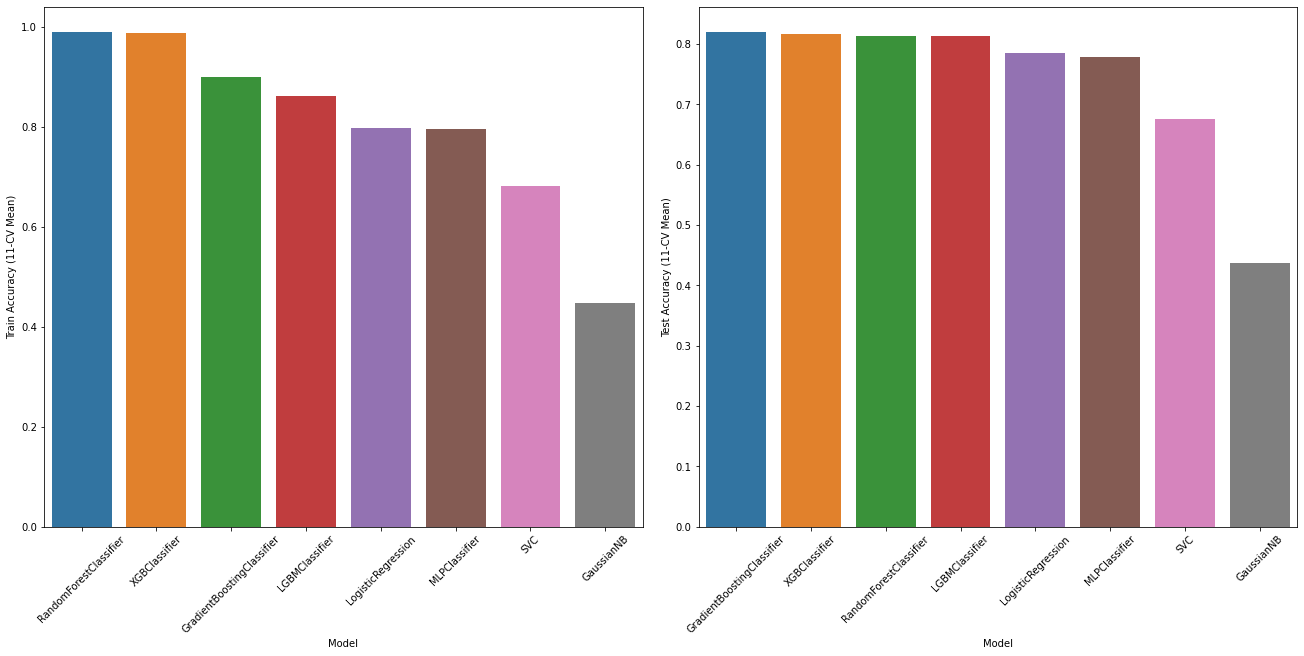

In [282]:
results_plot(train_acc_dict,test_acc_dict,'Train Accuracy (11-CV Mean)', 'Test Accuracy (11-CV Mean)')

In [283]:
# Fitting time 
for key in time_dict.keys():
    print('{} - {:.1f}secs'.format(key,time_dict[key]))

LogisticRegression - 0.0secs
GradientBoostingClassifier - 0.1secs
RandomForestClassifier - 0.3secs
LGBMClassifier - 0.1secs
XGBClassifier - 0.2secs
GaussianNB - 0.0secs
MLPClassifier - 0.7secs
SVC - 0.1secs


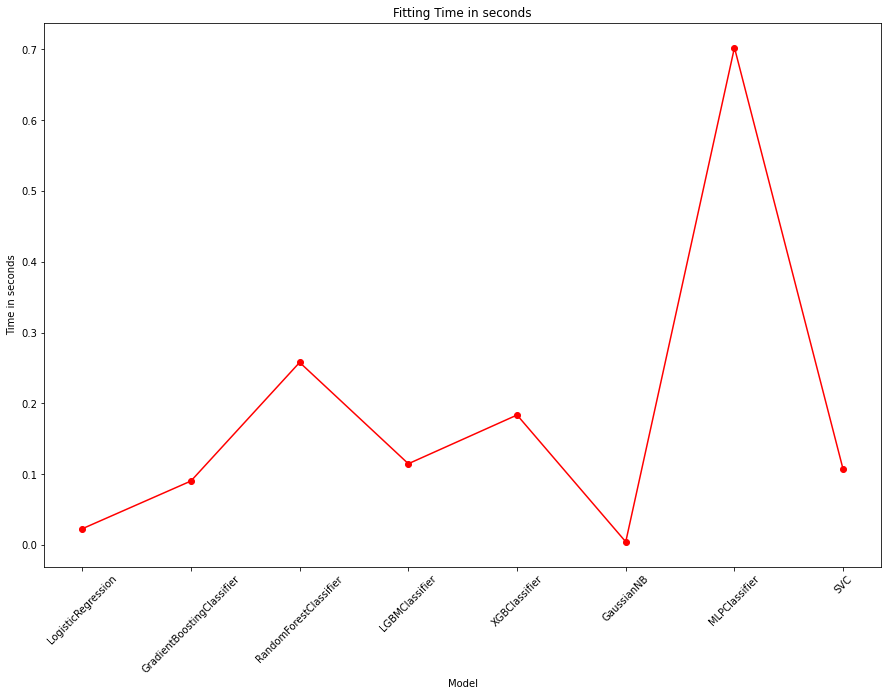

In [284]:
results_plot(time_dict,None,ylabel_1="Time in seconds",ylabel_2=None,title="Fitting Time in seconds")

In [286]:
m_gbc.fit(X,y)
prediction=m_gbc.predict(test)

In [287]:
file=pd.read_csv("test.csv")
Passenger_ID=file["PassengerId"]
StackingSubmission = pd.DataFrame({ 'PassengerId': Passenger_ID,
                            'Survived': prediction })
StackingSubmission.to_csv("My_Predictions.csv",index=False)